In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
train_data_dir = './vegfresh/train'

image_height = 256
image_width = 256


train_data_generator = ImageDataGenerator(rescale=1./255,
                                     rotation_range=45,
                                     zoom_range=0.3,
                                     horizontal_flip=True)  
train_data = train_data_generator.flow_from_directory(
    train_data_dir,
    target_size=(image_height, image_width),
    batch_size=32,
    class_mode='sparse',
    shuffle=True
)

Found 1000 images belonging to 2 classes.


In [5]:
val_data_dir = './vegfresh/val'

val_data_generator = ImageDataGenerator(rescale=1./255,
                                     rotation_range=45,
                                     horizontal_flip=True)
val_data = train_data_generator.flow_from_directory(
    val_data_dir,
    target_size=(image_height, image_width),
    batch_size=2,
    class_mode='sparse',
    shuffle=True
)

Found 410 images belonging to 2 classes.


In [8]:
model = Sequential()


model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 128)     

In [9]:
model.fit(
    train_data,
    epochs=20,
    validation_data=val_data
)

Epoch 1/20
32/32 [==============================] - 606s 18s/step - loss: 0.4867 - accuracy: 0.7880 - val_loss: 1.0062 - val_accuracy: 0.5561
Epoch 2/20
32/32 [==============================] - 318s 10s/step - loss: 0.3619 - accuracy: 0.8620 - val_loss: 0.9248 - val_accuracy: 0.5610
Epoch 3/20
32/32 [==============================] - 463s 15s/step - loss: 0.3908 - accuracy: 0.8460 - val_loss: 1.0323 - val_accuracy: 0.5683
Epoch 4/20
32/32 [==============================] - 408s 13s/step - loss: 0.3161 - accuracy: 0.8830 - val_loss: 0.9461 - val_accuracy: 0.5927
Epoch 5/20
32/32 [==============================] - 360s 11s/step - loss: 0.2969 - accuracy: 0.8870 - val_loss: 0.7259 - val_accuracy: 0.6732
Epoch 6/20
32/32 [==============================] - 323s 10s/step - loss: 0.2492 - accuracy: 0.9040 - val_loss: 0.7036 - val_accuracy: 0.7000
Epoch 7/20
32/32 [==============================] - 262s 8s/step - loss: 0.2453 - accuracy: 0.9080 - val_loss: 0.7319 - val_accuracy: 0.7366
Epoch 8

In [10]:
test_data_dir = './vegfresh/test'

test_data_generator = ImageDataGenerator(rescale=1./255,
                                     rotation_range=45,
                                     horizontal_flip=True)
test_data = test_data_generator.flow_from_directory(
    test_data_dir,
    target_size=(image_height, image_width),
    batch_size=2,
    class_mode='sparse',
    shuffle=False
)

loss, accuracy = model.evaluate(test_data)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')

Found 196 images belonging to 2 classes.
98/98 [==============================] - 30s 307ms/step - loss: 0.0444 - accuracy: 0.9949
Test loss: 0.0444
Test accuracy: 0.9949


C:\Users\EunHa\AppData\Local\Temp\ipykernel_1568\3717467515.py:10: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred = model.predict_generator(test_data)


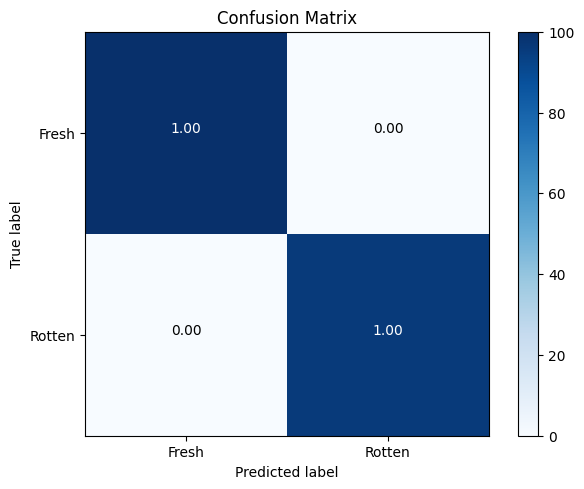

In [11]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools

num_classes = len(test_data.class_indices)

y_pred = model.predict_generator(test_data)

y_pred = np.argmax(y_pred, axis=1)

y_true = test_data.classes

cm = confusion_matrix(y_true, y_pred)

class_labels = test_data.class_indices.keys()

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, class_labels)
plt.yticks(tick_marks, class_labels)

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

thresh = cm_normalized.max() / 2.0
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm_normalized[i, j], '.2f'),
             horizontalalignment="center",
             color="white" if cm_normalized[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


In [12]:
predictions = model.predict(test_data)
predicted_labels = np.where(predictions > 0.5, 1, 0)

true_labels = test_data.labels

cm = confusion_matrix(true_labels, predicted_labels)

class_labels = ['Fresh', 'Rotten']

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels)
plt.yticks(tick_marks, class_labels)

thresh = cm.max() / 2.0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.tight_layout()
plt.show()


44/98 [============>.................] - ETA: 6s

c:\Users\EunHa\AppData\Local\Programs\Python\Python310\lib\site-packages\PIL\Image.py:979: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


98/98 [==============================] - 21s 210ms/step


ValueError: Classification metrics can't handle a mix of binary and multilabel-indicator targets

In [13]:
import cv2 as cv 
import tensorflow as tf

1/1 [==============================] - 0s 109ms/step
This image most likely belongs to Rotten


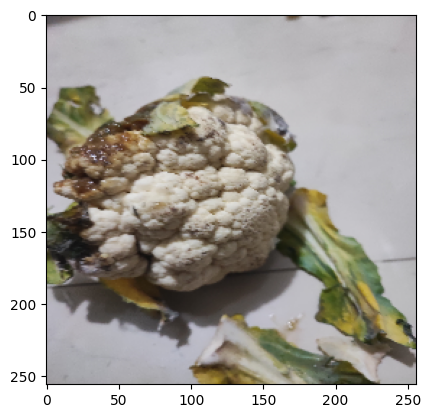

In [41]:
test_path = './vegfresh/test/Rotten/1686110265215.jpg'
labels = ["Fresh", "Rotten"]

img = cv.imread(test_path)
rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
resized = cv.resize(rgb, (256,256))
img_array = np.expand_dims(resized, 0)

predictions = model.predict(img_array)

print(
    "This image most likely belongs to {}"
    .format(labels[np.argmax(predictions)])
)

plt.imshow(resized)
plt.show()

In [29]:
saved_model_path = "./my_modelfresh2.h5"

model.save(saved_model_path)

In [30]:
! tensorflowjs_converter \
    --input_format=keras \
    {saved_model_path} \
    "./"

2023-06-12 18:23:28.482208: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2023-06-12 18:23:28.483033: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
